Librerías


In [1]:
#Importamos la librería para leer el fichero con los datos de conexión a la base de datos:
import os
from dotenv import load_dotenv

#Importamos las librerías necesarias para manejar los datos y crear las gráficas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importamos las librerías necesarias para la conexión con la base de datos:

import mysql.connector as sql
from mysql.connector import Error

from sqlalchemy import create_engine

#Importación librería plotly para el gráfico de red de araña/radar
import plotly.graph_objects as go
import plotly.express as px

In [2]:
diractual = os.getcwd()
diractual

'c:\\Users\\Usuario\\Documents\\Data Analytics\\ProjecteIT\\ProjecteData\\Equip_G\\Scripts'

Importación del csv del dataframe de limpieza.

Esta celda y la siguiente se pueden eliminar en caso de fusionarla con otros scripts.

In [3]:
df = pd.read_csv(r'../Data/2025_04_10_Sprint01.csv')

In [4]:
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities,days_occupied,occupancy_rate
4067,18263766,Apartamento 1a linea mar con parquing,"Apartamento de 90 m2, primera l�nea de mar, en...",126077779,Castell-Platja d'Aro,NaN,Entire home/apt,6,2.0,3.0,...,100.0,90.0,FALSO,101.0,spain,girona,2021-02-27,"elevator, washer, workspace, nespresso machine...",1,3.333333
5294,21577762,Rustic Chic Studio Downtown (C80),Welcome to our brand new apartment in the cent...,5890675,Centro,NaN,Entire home/apt,2,1.0,1.0,...,100.0,100.0,VERDADERO,245.0,spain,malaga,2021-02-27,"kitchen, air conditioning, essentials, smart l...",30,100.000000
461,1584877,Sea view penthouse in Calan Porter,Lovely and cozy sea view penthouse in the resi...,8443770,Alaior,NaN,Entire home/apt,4,1.0,2.0,...,90.0,90.0,VERDADERO,55.0,spain,menorca,2021-02-27,"washer, bathroom essentials, nespresso machine...",0,0.000000
5637,22626728,Atic Colera,"Atico con mucha mucha luz, con 2 terrazas exte...",166569559,Colera,NaN,Entire home/apt,6,2.0,3.0,...,100.0,100.0,FALSO,31.0,spain,girona,2021-02-27,"elevator, washer, workspace, bathroom essentia...",2,6.666667
5078,20854917,Estudio para 2 personas zona Arenal,Este estudio de 25 m2 presenta una decoraci�n ...,137959507,Arenal,Casco Antiguo,Hotel room,2,1.0,1.0,...,100.0,100.0,VERDADERO,4.0,spain,sevilla,2021-02-27,"elevator, washer, first aid kit, workspace, ba...",5,16.666667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6733 entries, 4067 to 2456
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 6733 non-null   int64  
 1   name                         6730 non-null   object 
 2   description                  6706 non-null   object 
 3   host_id                      6733 non-null   int64  
 4   neighbourhood_name           6733 non-null   object 
 5   neighbourhood_district       4075 non-null   object 
 6   room_type                    6733 non-null   object 
 7   accommodates                 6733 non-null   int64  
 8   bathrooms                    6706 non-null   float64
 9   bedrooms                     6706 non-null   float64
 10  beds                         6730 non-null   float64
 11  amenities_list               6716 non-null   object 
 12  price                        6733 non-null   float64
 13  minimum_nights      

In [6]:
# EDA de Experiencia del Cliente

df[['apartment_id', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month','city']].describe(include='all')

,apartment_id,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city
count,6.733000e+03,5516,5517,5446.000000,5437.000000,5443.000000,5432.000000,5441.000000,5431.000000,5431.000000,5516.000000,6733
unique,NaN,1790,1452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,2018-04-01,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,barcelona
freq,NaN,25,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2041
mean,1.512717e+07,NaN,NaN,920.104664,94.539268,93.161859,96.277614,96.432641,95.273430,91.461978,122.733684,NaN
std,7.729288e+06,NaN,NaN,85.932940,9.108241,9.755222,8.010918,7.651143,7.322723,9.348894,152.617697,NaN
min,1.196400e+04,NaN,NaN,200.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,NaN
25%,8.699662e+06,NaN,NaN,890.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,17.000000,NaN
50%,1.677280e+07,NaN,NaN,940.000000,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,56.000000,NaN
75%,2.148062e+07,NaN,NaN,980.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,176.000000,NaN


In [7]:
# Imputar fecha de inserción del registro para los casos en que hay reseñas y la last_review_date es nula:

df.loc[df['last_review_date'].isna() & df['first_review_date'].notna(), 'last_review_date'] = df['insert_date']

In [8]:
df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities,days_occupied,occupancy_rate
4067,18263766,Apartamento 1a linea mar con parquing,"Apartamento de 90 m2, primera l�nea de mar, en...",126077779,Castell-Platja d'Aro,NaN,Entire home/apt,6,2.0,3.0,...,100.0,90.0,FALSO,101.0,spain,girona,2021-02-27,"elevator, washer, workspace, nespresso machine...",1,3.333333
5294,21577762,Rustic Chic Studio Downtown (C80),Welcome to our brand new apartment in the cent...,5890675,Centro,NaN,Entire home/apt,2,1.0,1.0,...,100.0,100.0,VERDADERO,245.0,spain,malaga,2021-02-27,"kitchen, air conditioning, essentials, smart l...",30,100.000000
461,1584877,Sea view penthouse in Calan Porter,Lovely and cozy sea view penthouse in the resi...,8443770,Alaior,NaN,Entire home/apt,4,1.0,2.0,...,90.0,90.0,VERDADERO,55.0,spain,menorca,2021-02-27,"washer, bathroom essentials, nespresso machine...",0,0.000000
5637,22626728,Atic Colera,"Atico con mucha mucha luz, con 2 terrazas exte...",166569559,Colera,NaN,Entire home/apt,6,2.0,3.0,...,100.0,100.0,FALSO,31.0,spain,girona,2021-02-27,"elevator, washer, workspace, bathroom essentia...",2,6.666667
5078,20854917,Estudio para 2 personas zona Arenal,Este estudio de 25 m2 presenta una decoraci�n ...,137959507,Arenal,Casco Antiguo,Hotel room,2,1.0,1.0,...,100.0,100.0,VERDADERO,4.0,spain,sevilla,2021-02-27,"elevator, washer, first aid kit, workspace, ba...",5,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,3771149,"Central, double/twin, private bath","Classical-Style apartment, in the centre of Ba...",19327835,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,3.0,1.0,...,90.0,90.0,FALSO,228.0,spain,barcelona,2017-01-04,"kitchen, hangers, breakfast, essentials, smoki...",28,93.333333
895,3810717,Amazing flat in the very center,"Modern, beautiful and renewed flat at Born. Ve...",19587234,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,Entire home/apt,2,1.0,1.0,...,100.0,100.0,FALSO,33.0,spain,barcelona,2017-01-04,"kitchen, air conditioning, essentials, transla...",30,100.000000
902,3847290,Banyoles,Amplia habitaci�n exterior muy luminosa co...,19681580,el Barri G�tic,Ciutat Vella,Private room,2,1.0,1.0,...,100.0,100.0,FALSO,2.0,spain,barcelona,2017-01-04,"air conditioning, smoke detector, essentials, ...",0,0.000000
2105,11411444,Cute apartment close to Pg.Gr�cia a,Cute apartment in Gracia! near Metro Diagonal...,14368366,la Vila de Gr�cia,Gr�cia,Entire home/apt,2,1.0,1.0,...,90.0,90.0,FALSO,147.0,spain,barcelona,2017-01-04,"kitchen, air conditioning, essentials, hair dr...",1,3.333333


Text(0.5, 0, 'N.º de reseñas')

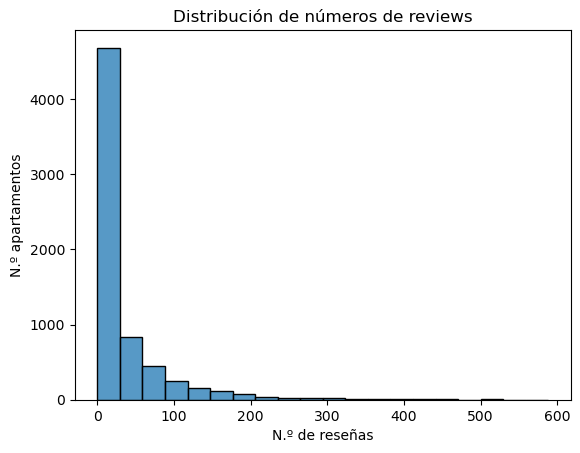

In [9]:
ax = sns.histplot(data=df, x='number_of_reviews', bins=20)
ax.set_title("Distribución de números de reviews")
ax.set_ylabel("N.º apartamentos")
ax.set_xlabel("N.º de reseñas")

Text(0.5, 0.98, 'Kde de distribución de reviews')

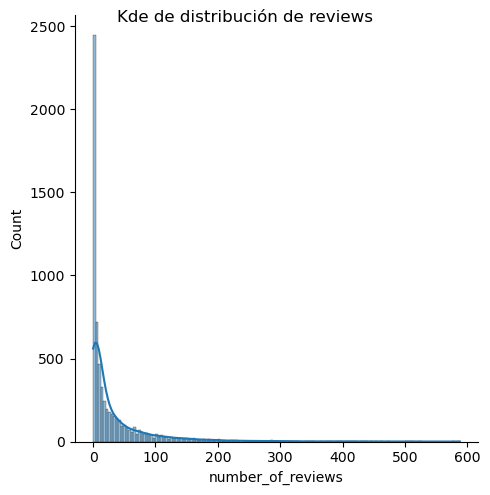

In [10]:
ax = sns.displot(data=df, x='number_of_reviews', kde=True)
ax.figure.suptitle("Kde de distribución de reviews")

Text(0.5, 1.0, 'Distribución estadística del rating total por ciudad')

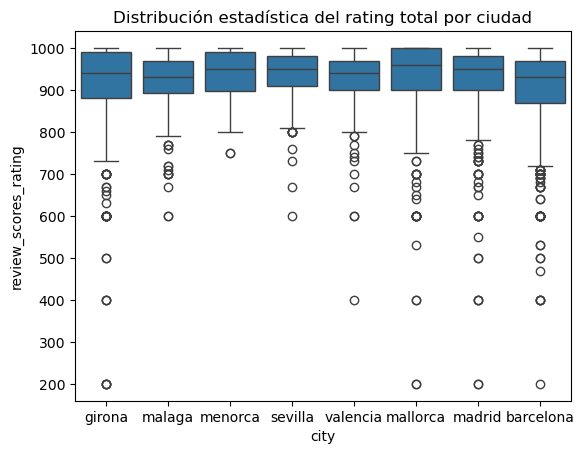

In [11]:
ax = sns.boxplot(data=df, x='city', y='review_scores_rating')
ax.set_title("Distribución estadística del rating total por ciudad")

Text(0.5, 1.0, 'Distribución estadística del rating total por tipo de alojamiento')

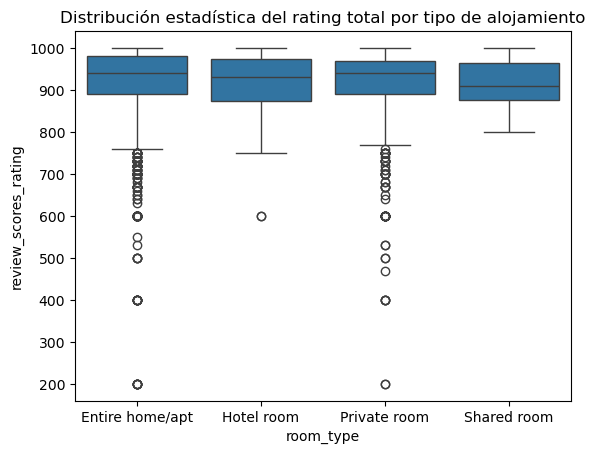

In [12]:
ax = sns.boxplot(data=df, x='room_type', y='review_scores_rating')
ax.set_title("Distribución estadística del rating total por tipo de alojamiento")

In [13]:
#Cantidad de apartamentos sin reseñas
sin_reseñas = df['first_review_date'].isna().sum()
print(f"Número de apartamentos sin reseñas: {sin_reseñas}")

#Porcentaje de apartamentos del total
porcentaje_sin_reseñas = (sin_reseñas / len(df)) * 100
print(f"Porcentaje de apartamentos sin reseñas: {porcentaje_sin_reseñas:.2f} %")

Número de apartamentos sin reseñas: 1217
Porcentaje de apartamentos sin reseñas: 18.08 %


In [14]:
top_apartamentos_puntos = df.sort_values(['review_scores_rating', 'number_of_reviews'], ascending=False)
top_apartamentos_puntos.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities,days_occupied,occupancy_rate
2218,11989301,Vivienda San Mart�n II,Rel�jate y desconecta mientras la c�lida luz v...,34840363,SANT FRANCESC,CIUTAT VELLA,Entire home/apt,4,1.0,1.0,...,100.0,100.0,VERDADERO,394.0,spain,valencia,2019-12-31,"smoke detector, accessible-height bed, elevato...",23,76.666667
1783,9122183,Casa sevillana en barrio historico,Habitaci�n luminosa con terraza privada para u...,47528412,Pio XII,Macarena,Private room,2,2.0,1.0,...,90.0,100.0,FALSO,347.0,spain,sevilla,2019-07-29,"accessible-height bed, washer, first aid kit, ...",30,100.000000
5759,22979863,"Stylish Apt PZA MAYOR/La Latina 2BD* 2BT*, 6p max","Cozy and well-designed 2 bedroom apartment, co...",29281033,Palacio,Centro,Entire home/apt,6,2.0,2.0,...,100.0,100.0,VERDADERO,376.0,spain,madrid,2021-01-12,"elevator, washer, workspace, bathroom essentia...",29,96.666667
6072,23782265,Romantic and Rustic Penthouse with a Sun Kisse...,Marvel at an adorable cottage-like space in an...,40929334,ARRANCAPINS,EXTRAMURS,Entire home/apt,2,1.0,1.0,...,100.0,90.0,VERDADERO,501.0,spain,valencia,2020-05-31,"elevator, washer, workspace, bathroom essentia...",1,3.333333
5587,22479174,Private room in detached house,"Cozy private room in a detached villa, near Ad...",80975261,Rejas,San Blas - Canillejas,Private room,2,2.0,1.0,...,100.0,100.0,FALSO,327.0,spain,madrid,2020-08-25,"breakfast, first aid kit, washer, private livi...",4,13.333333
3365,16292600,BCN Luxury,Lujoso apartamento en pleno centro de Barcelon...,15944590,l'Antiga Esquerra de l'Eixample,Eixample,Entire home/apt,4,2.0,2.0,...,100.0,100.0,FALSO,274.0,spain,barcelona,2020-02-16,"elevator, washer, bathroom essentials, nespres...",12,40.000000
309,1073748,"MAGIC PLACE IN BARCELONA, WITH POOL",<b>The space</b><br />MAGIC PLACE IN BARCELONA...,5159312,"Vallvidrera, el Tibidabo i les Planes",Sarri�-Sant Gervasi,Entire home/apt,4,1.0,1.0,...,100.0,100.0,VERDADERO,101.0,spain,barcelona,2020-11-06,"elevator, washer, workspace, bathroom essentia...",30,100.000000
3717,17384311,"Cubic House Garden, Cala Morlanda.",Cozy designer apartment located in a nice gar...,11087082,Manacor,NaN,Entire home/apt,3,1.0,1.0,...,90.0,100.0,VERDADERO,196.0,spain,mallorca,2020-10-21,"ethernet connection, first aid kit, washer, wo...",0,0.000000
5404,21916433,Typical majorcan house in Llucmajor,Cozy 2 floors family house with 5 double bedro...,159911693,Llucmajor,NaN,Entire home/apt,10,3.0,5.0,...,90.0,100.0,FALSO,314.0,spain,mallorca,2020-03-22,"breakfast, washer, private living room, bathro...",9,30.000000
5408,21925668,�tico con piscina Triana 2mm del Centro de sev...,Nous sommes � Triana � 2mm du centre de Sevill...,15589434,Triana Casco Antiguo,Triana,Entire home/apt,7,2.0,3.0,...,100.0,100.0,VERDADERO,514.0,spain,sevilla,2019-02-18,"elevator, washer, first aid kit, private livin...",27,90.000000


In [15]:
top_apartamentos_num_reviews = df.sort_values(['number_of_reviews', 'review_scores_rating'], ascending=False)
top_apartamentos_num_reviews.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities,days_occupied,occupancy_rate
63,384727,Private Room in Center of Seville,"located in the centre of Seville, offers accom...",1920069,Arenal,Casco Antiguo,Private room,2,1.0,1.0,...,100.0,100.0,FALSO,681.0,spain,sevilla,2019-06-29,"hangers, air conditioning, essentials, transla...",30,100.000000
264,959840,PL REAL (Sq) PENTHOUSE Rooftop,"Rustic penthous with old beams,old ceramic flo...",5223863,el Barri G�tic,Ciutat Vella,Private room,2,2.0,1.0,...,100.0,100.0,VERDADERO,71.0,spain,barcelona,2019-12-10,"smoke detector, breakfast, accessible-height b...",26,86.666667
511,1871218,�tico apartamento VFT/SE/00804,"�tico muy luminoso. Consta de: Sal�n, Ba�o, Co...",9751847,"Le�n XIII, Los Naranjos",Macarena,Entire home/apt,2,1.0,1.0,...,90.0,80.0,VERDADERO,698.0,spain,sevilla,2020-01-30,"washer, first aid kit, bathroom essentials, ki...",7,23.333333
729,3058631,"Private Studio in Sol, Madrid","We are offering a clean, well presented and re...",14370747,Sol,Centro,Entire home/apt,3,1.0,1.0,...,100.0,90.0,FALSO,698.0,spain,madrid,2020-07-17,"elevator, washer, workspace, bathroom essentia...",30,100.000000
98,526513,Sol. Your home in Madrid�s Heart,DESIGN apartment in the HEART of Madrid.<br />...,1134989,Sol,Centro,Entire home/apt,5,1.0,2.0,...,100.0,100.0,VERDADERO,491.0,spain,madrid,2021-01-12,"elevator, first aid kit, washer, workspace, ba...",23,76.666667
753,3143400,Great room in the center of Madrid,"Bright room in hortaleza Street, next to Gran ...",15328893,Justicia,Centro,Private room,2,1.0,1.0,...,100.0,100.0,VERDADERO,773.0,spain,madrid,2020-10-17,"washer, bathroom essentials, nespresso machine...",30,100.000000
145,681925,"Very Central, Stunning Views, Sunny Terrace, W...",FANTASTIC PENTHOUSE LOCATED IN THE CENTER OF V...,3462415,EL PILAR,CIUTAT VELLA,Entire home/apt,2,1.0,1.0,...,100.0,100.0,VERDADERO,624.0,spain,valencia,2019-05-31,"smoke detector, elevator, washer, first aid ki...",27,90.000000
478,1670427,Walk everywhere!Brand new apartWIFI,The apartment is right in the center of Barce...,8843962,la Dreta de l'Eixample,Eixample,Entire home/apt,5,1.0,1.0,...,100.0,90.0,VERDADERO,588.0,spain,barcelona,2020-10-12,"elevator, washer, workspace, kitchen, microwav...",3,10.000000
936,4028518,Renovated & Vintage en Barcelona,Welcome to this cozy apartment located in the ...,20886062,la Sagrada Fam�lia,Eixample,Entire home/apt,4,1.0,2.0,...,100.0,100.0,VERDADERO,712.0,spain,barcelona,2020-03-16,"elevator, washer, first aid kit, bathroom esse...",1,3.333333
1313,6289283,Cozy apartment near El Raval,Nice bright room with large private terrace (p...,32695481,el Raval,Ciutat Vella,Private room,2,1.0,1.0,...,90.0,90.0,VERDADERO,78.0,spain,barcelona,2020-03-16,"elevator, washer, lock on bedroom door, bathro...",4,13.333333


### Índice de satisfacción general

In [16]:
Indice_satisfaccion_general = df['review_scores_value'].sum() / df['apartment_id'].count()

print(f'El índice de satisfacción general es: {Indice_satisfaccion_general:.2f}')

El índice de satisfacción general es: 73.78


### Ítem con la mayor puntuación promedio

In [17]:
# Diccionario para traducir los nombres de las columnas de evaluación específicas
traducciones = {
    'review_scores_accuracy': 'Precisión',
    'review_scores_cleanliness': 'Limpieza',
    'review_scores_checkin': 'Registro',
    'review_scores_communication': 'Comunicaciones',
    'review_scores_location': 'Ubicación'
}

# Columnas originales
cols = list(traducciones.keys())

# Calcular la media de cada una (ignorando NaN)
mean_scores = df[cols].mean().rename(traducciones)

# Mostrar la métrica con mayor media
max_metric = mean_scores.idxmax()
max_value = mean_scores.max()

print(f"La métrica con la mayor puntuación promedio es: {max_metric} con un valor de {max_value:.2f}")


La métrica con la mayor puntuación promedio es: Comunicaciones con un valor de 96.43


Gráfica de radar para representar las puntuaciones

In [18]:
#Trazamos la gráfica de radar

fig = px.line_polar(df, r=mean_scores.values, theta=mean_scores.index, range_r=(90, 100), line_close=True)
fig.update_traces(fill='toself')

#Añadimos los valores

fig.add_trace(go.Scatterpolar(
    r=mean_scores.values,
    theta=mean_scores.index,
    mode='markers+text',
    marker=dict(color='blue', size=5, symbol='circle'),
    text=mean_scores.values.round(2),
    textposition='top center',
    name='Valores',
    showlegend=False
))

#Marcamos el valor máximo

fig.add_trace(go.Scatterpolar(
    r=[max_value],
    theta=[max_metric],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name='Valor máximo',
    showlegend=False
))

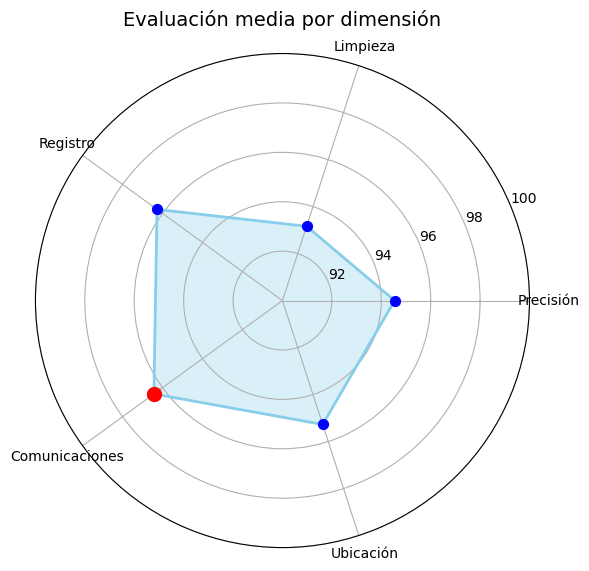

In [24]:
# Lo mismo, pero en matplotlib (importable a Power BI; plotly es interactivo y no se muestra en dashboards)
# Traducción
traducciones = {
    'review_scores_accuracy': 'Precisión',
    'review_scores_cleanliness': 'Limpieza',
    'review_scores_checkin': 'Registro',
    'review_scores_communication': 'Comunicaciones',
    'review_scores_location': 'Ubicación'
}

cols = list(traducciones.keys())
mean_scores = df[cols].mean().rename(traducciones)

# Preparar datos para radar
labels = mean_scores.index
values = mean_scores.values
num_vars = len(labels)

# Asegurarse de cerrar el gráfico
values = np.append(values, values[0])
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Buscar valor máximo
max_idx = np.argmax(mean_scores.values)
max_angle = angles[max_idx]
max_value = mean_scores.values[max_idx]

# Crear gráfico
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Trazar línea principal
ax.plot(angles, values, color='skyblue', linewidth=2)
ax.fill(angles, values, color='skyblue', alpha=0.3)

# Trazar puntos
ax.scatter(angles[:-1], mean_scores.values, color='blue', s=50, zorder=5)

# Resaltar punto máximo
ax.scatter([max_angle], [max_value], color='red', s=100, zorder=6)

# Añadir etiquetas
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Ajustar rango radial
ax.set_ylim(90, 100)

# Mostrar
plt.title("Evaluación media por dimensión", size=14, pad=20)
plt.tight_layout()
plt.show()


### Respuestas de negocio

Puntuación media de los usuarios

In [19]:
media_valor = df['review_scores_value'].mean()
print(f"Puntuación media otorgada por los usuarios: {media_valor:.2f}")

Puntuación media otorgada por los usuarios: 91.46


 Porcentaje de alojamientos por ciudad que superan una puntuación de 80

In [20]:

# Crear una columna booleana para marcar los que superan 80
df['supera_80'] = df['review_scores_value'] > 80

# Agrupar por ciudad y calcular el porcentaje
porcentaje_por_ciudad = (
    df.groupby('city')['supera_80']
    .mean().sort_values(ascending=False) * 100
).round(2)

print(pd.DataFrame(porcentaje_por_ciudad))


           supera_80
city                
sevilla        85.63
valencia       82.83
malaga         78.76
madrid         74.43
barcelona      66.88
menorca        63.04
mallorca       60.49
girona         54.01


In [21]:
porcentaje_por_ciudad.info()

<class 'pandas.core.series.Series'>
Index: 8 entries, sevilla to girona
Series name: supera_80
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 128.0+ bytes


In [22]:
porcentaje_por_ciudad = pd.DataFrame(porcentaje_por_ciudad)
porcentaje_por_ciudad.info()
                                     

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, sevilla to girona
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   supera_80  8 non-null      float64
dtypes: float64(1)
memory usage: 128.0+ bytes


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5028\1923502712.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




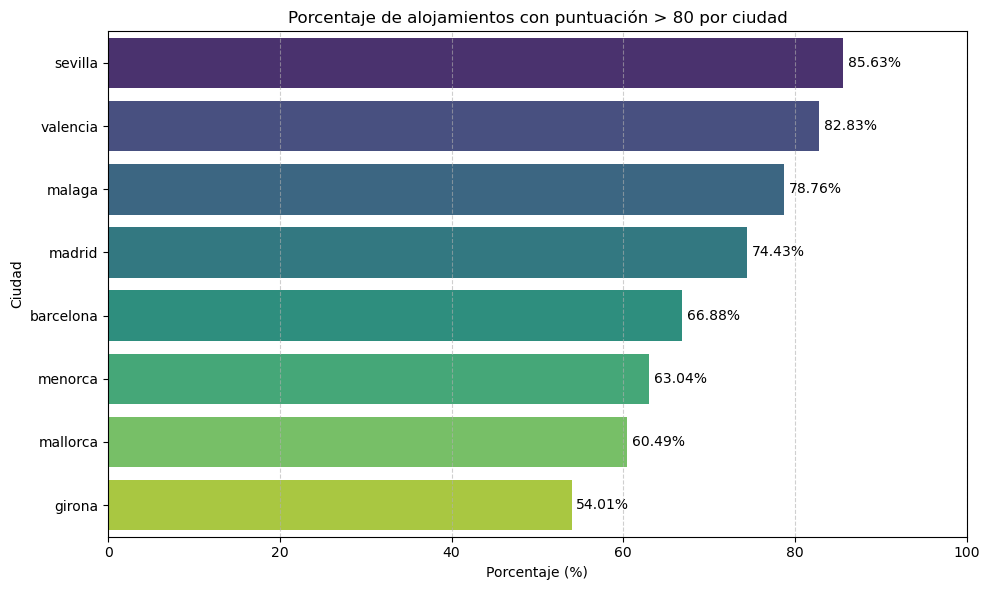

In [23]:
# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=porcentaje_por_ciudad, x='supera_80', y='city', palette='viridis')

# Anotar porcentajes
for index, row in porcentaje_por_ciudad.iterrows():
    plt.text(row['supera_80'] + 0.5, index, f"{row['supera_80']}%", va='center')

# Ajustes visuales
plt.title('Porcentaje de alojamientos con puntuación > 80 por ciudad')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Ciudad')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()